There are two different files because the UI is different

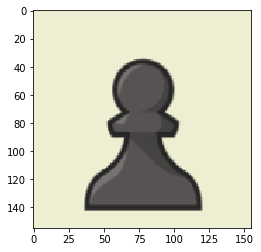

In [48]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = plt.imread("../data/raw/90pct_size_vs_computer.png")
i = 0
j = 0
X = []
y = np.zeros([64,3])
record = 0
for i in range(8):
    for j in range(8):
        cord_x = 340 + 159*i
        cord_y = 86 + 159*j
        # White Pawn
        if i == 6:
            y[record, 0] = 1
        # Black Pawn
        elif i == 1:
            y[record, 1] = 1
        else:
            y[record, 2] = 1
        X.append(data[cord_x:cord_x+155,cord_y:cord_y+155,:].flatten())
        record += 1
        plt.imshow(data[cord_x:cord_x+155,cord_y:cord_y+155,:])
        plt.savefig('../data/interim/{}_{}.png'.format(i,j))


In [49]:

X = pd.DataFrame(X).values
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(1)
model.fit(rescaledX, y)

import pickle
def save_obj(obj, name ):
    with open('../models/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('../models/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

save_obj(model, "computer_model")
save_obj(scaler, "computer_scaler")
prediction = model.predict(rescaledX)
prediction


ValueError: Found input variables with inconsistent numbers of samples: [49, 64]